In [43]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from warnings import filterwarnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

filterwarnings('ignore')

In [44]:
def parser(s):
    return dt.strptime(s,'%Y-%m')

In [45]:
data_ic_h= pd.read_csv(r"D:\Datasets\ice_cream_vs_heater.csv", parse_dates=[0], index_col=0, date_parser=parser)

In [46]:
data_ic_h.head()

,heater,ice cream
Month,,
2004-01-01,27,13
2004-02-01,18,15
2004-03-01,14,16
2004-04-01,13,19
2004-05-01,13,21


In [47]:
data_ic_h.isnull().sum()

heater       0
ice cream    0
dtype: int64

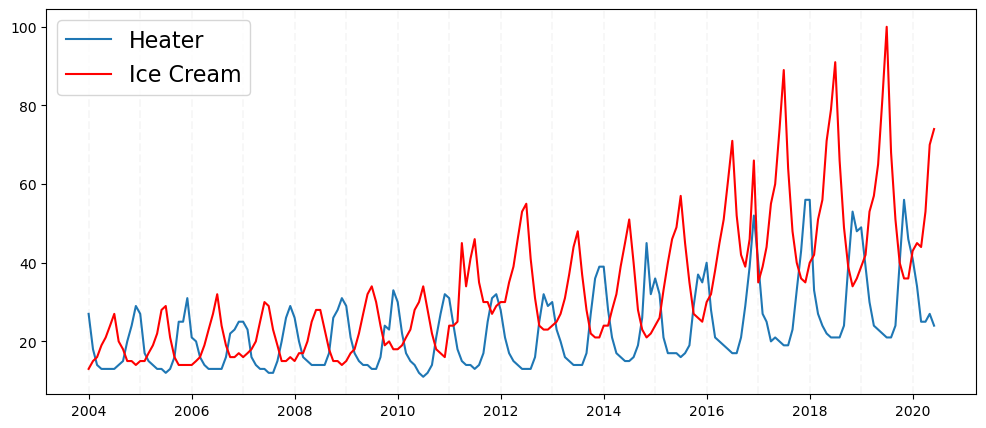

In [48]:
plt.figure(figsize=(12,5))
plt.plot(data_ic_h['heater'])
plt.plot(data_ic_h['ice cream'], color= 'red')

plt.legend(['Heater', 'Ice Cream'], fontsize=16)

for year in data_ic_h.index.year.unique():
    plt.axvline(dt(year,1,1), linestyle= '--', color= 'k', alpha= 0.03)

In [49]:
# we can see that we have lot of trends and seasonality in the data

### Normalize

In [50]:
avg, std= data_ic_h.mean(), data_ic_h.std()

In [51]:
avg

heater       22.792929
ice cream    33.060606
dtype: float64

In [52]:
for col in data_ic_h.columns:
    data_ic_h[col]=  (data_ic_h[col] - avg.loc[col])/std.loc[col]

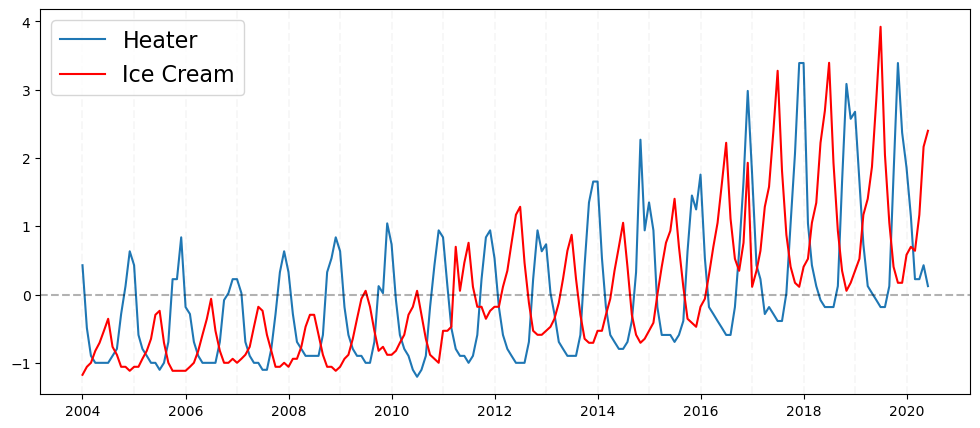

In [53]:
plt.figure(figsize=(12,5))
plt.plot(data_ic_h['heater'])
plt.plot(data_ic_h['ice cream'], color= 'red')

plt.legend(['Heater', 'Ice Cream'], fontsize=16)

for year in data_ic_h.index.year.unique():
    plt.axvline(dt(year,1,1), linestyle= '--', color= 'k', alpha= 0.03)
    
plt.axhline(0, linestyle='--', color= 'k', alpha= 0.3)

## Remove the Trend

In [54]:
data_ic_h= data_ic_h.diff().dropna()

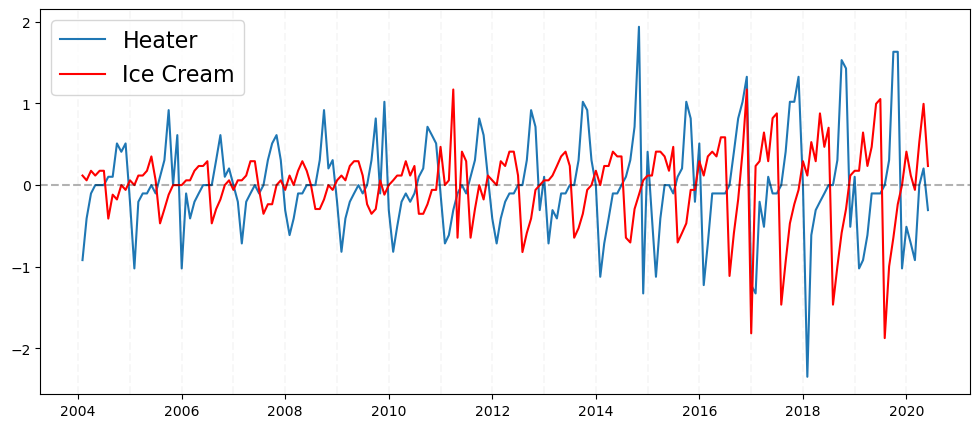

In [55]:
plt.figure(figsize=(12,5))
plt.plot(data_ic_h['heater'])
plt.plot(data_ic_h['ice cream'], color= 'red')

plt.legend(['Heater', 'Ice Cream'], fontsize=16)

for year in data_ic_h.index.year.unique():
    plt.axvline(dt(year,1,1), linestyle= '--', color= 'k', alpha= 0.03)
    
plt.axhline(0, linestyle='--', color= 'k', alpha= 0.3)

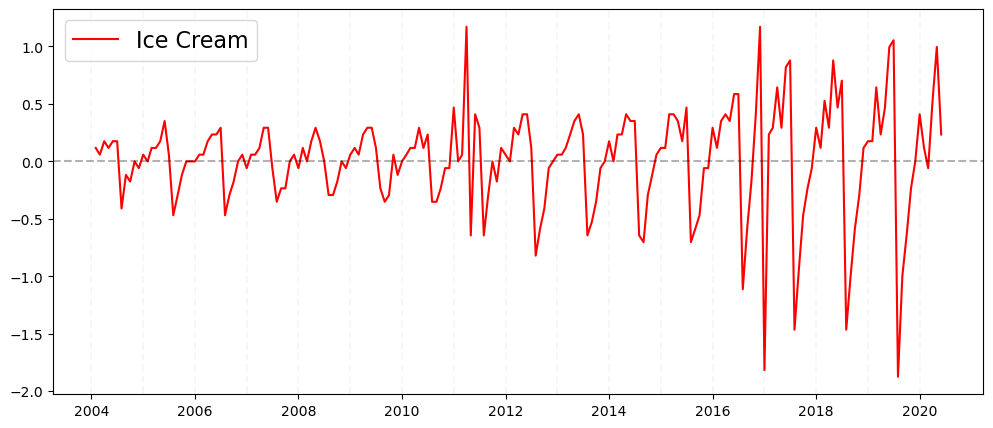

In [57]:
plt.figure(figsize=(12,5))
# plt.plot(data_ic_h['heater'])
plt.plot(data_ic_h['ice cream'], color= 'red')

plt.legend(['Ice Cream'], fontsize=16)

for year in data_ic_h.index.year.unique():
    plt.axvline(dt(year,1,1), linestyle= '--', color= 'k', alpha= 0.03)
    
plt.axhline(0, linestyle='--', color= 'k', alpha= 0.3)

## Remove Increasing Volatility

In [58]:
annual_vol= data_ic_h.groupby(data_ic_h['ice cream'].index.year).std()

In [59]:
annual_vol

,heater,ice cream
Month,,
2004,0.415481,0.184201
2005,0.474527,0.214837
2006,0.400148,0.227698
2007,0.359839,0.198947
2008,0.396182,0.183239
2009,0.499810,0.221038
2010,0.459566,0.211668
2011,0.443924,0.501018
2012,0.471104,0.389711


In [75]:
data_ic_h['icecream_vol']= data_ic_h.index.map(lambda d: annual_vol.loc[d.year, 'ice cream'])
data_ic_h['heater_vol']= data_ic_h.index.map(lambda d: annual_vol.loc[d.year, 'heater'])

In [76]:
data_ic_h

,heater,ice cream,icecream_vol,heater_vol
Month,,,,
2004-02-01,-0.918789,0.117140,0.184201,0.415481
2004-03-01,-0.408351,0.058570,0.184201,0.415481
2004-04-01,-0.102088,0.175710,0.184201,0.415481
2004-05-01,0.000000,0.117140,0.184201,0.415481
2004-06-01,0.000000,0.175710,0.184201,0.415481
...,...,...,...,...
2020-02-01,-0.714614,0.117140,0.369810,0.426657
2020-03-01,-0.918789,-0.058570,0.369810,0.426657
2020-04-01,0.000000,0.527129,0.369810,0.426657


In [80]:
data_ic_h['ice cream']= data_ic_h['ice cream']/data_ic_h['icecream_vol']
data_ic_h['heater']= data_ic_h['heater']/data_ic_h['heater_vol']

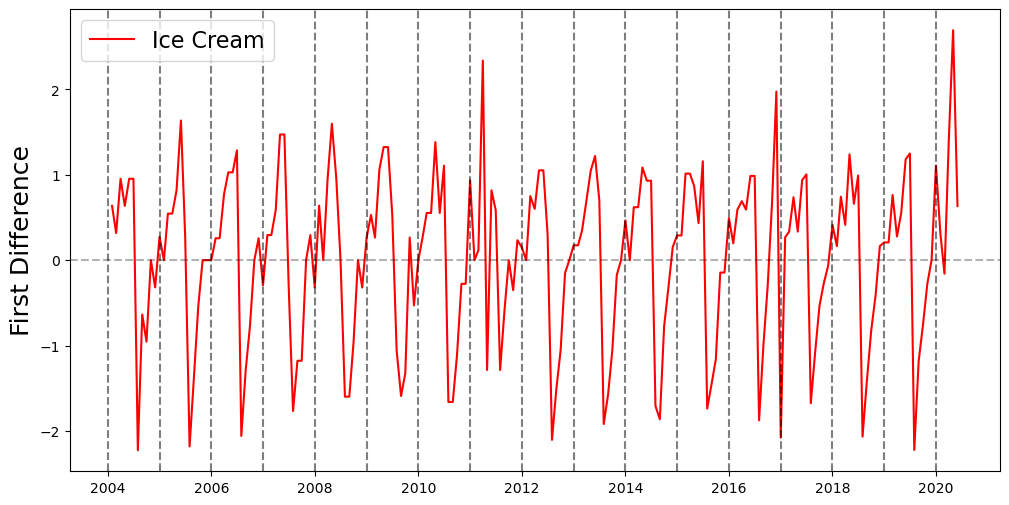

In [85]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(data_ic_h['ice cream'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

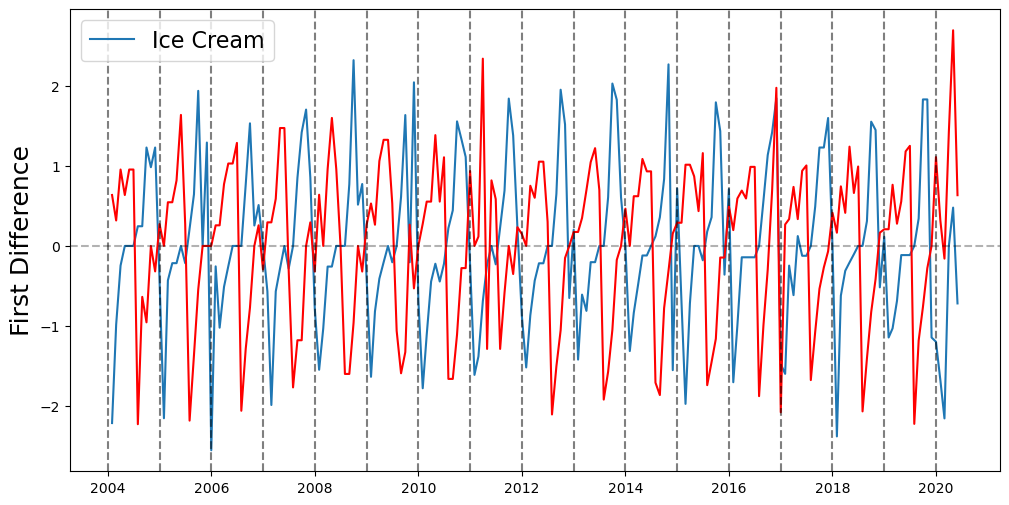

In [86]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(data_ic_h['heater'])
ice_cream, = plt.plot(data_ic_h['ice cream'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

## Remove Seasonality

In [87]:
month_avg= data_ic_h.groupby(data_ic_h.index.month).mean()

In [88]:
month_avg

,heater,ice cream,icecream_vol,heater_vol
Month,,,,
1,-0.428360,0.130345,0.415976,0.580717
2,-1.483129,0.250194,0.402342,0.570997
3,-1.063595,0.433016,0.402342,0.570997
4,-0.442926,0.838085,0.402342,0.570997
5,-0.121663,0.967273,0.402342,0.570997
6,-0.128425,0.987311,0.402342,0.570997
7,-0.107093,0.735052,0.404376,0.580018
8,0.075720,-1.821285,0.404376,0.580018
9,0.544638,-1.307661,0.404376,0.580018


In [90]:
data_ic_h['icecream_monthly']= data_ic_h.index.map(lambda d: month_avg.loc[d.month, 'ice cream'])
data_ic_h['heater_monthly']= data_ic_h.index.map(lambda d: month_avg.loc[d.month, 'heater'])

In [91]:
data_ic_h

,heater,ice cream,icecream_vol,heater_vol,icecream_monthly,heater_monthly
Month,,,,,,
2004-02-01,-2.211387,0.635934,0.184201,0.415481,0.250194,-1.483129
2004-03-01,-0.982838,0.317967,0.184201,0.415481,0.433016,-1.063595
2004-04-01,-0.245710,0.953901,0.184201,0.415481,0.838085,-0.442926
2004-05-01,0.000000,0.635934,0.184201,0.415481,0.967273,-0.121663
2004-06-01,0.000000,0.953901,0.184201,0.415481,0.987311,-0.128425
...,...,...,...,...,...,...
2020-02-01,-1.674916,0.316756,0.369810,0.426657,0.250194,-1.483129
2020-03-01,-2.153463,-0.158378,0.369810,0.426657,0.433016,-1.063595
2020-04-01,0.000000,1.425403,0.369810,0.426657,0.838085,-0.442926


In [92]:
data_ic_h['ice cream']= data_ic_h['ice cream'] - data_ic_h['icecream_monthly']
data_ic_h['heater']= data_ic_h['heater'] - data_ic_h['heater_monthly']

In [93]:
data_ic_h

,heater,ice cream,icecream_vol,heater_vol,icecream_monthly,heater_monthly
Month,,,,,,
2004-02-01,-0.728257,0.385740,0.184201,0.415481,0.250194,-1.483129
2004-03-01,0.080757,-0.115049,0.184201,0.415481,0.433016,-1.063595
2004-04-01,0.197217,0.115816,0.184201,0.415481,0.838085,-0.442926
2004-05-01,0.121663,-0.331339,0.184201,0.415481,0.967273,-0.121663
2004-06-01,0.128425,-0.033411,0.184201,0.415481,0.987311,-0.128425
...,...,...,...,...,...,...
2020-02-01,-0.191787,0.066562,0.369810,0.426657,0.250194,-1.483129
2020-03-01,-1.089868,-0.591394,0.369810,0.426657,0.433016,-1.063595
2020-04-01,0.442926,0.587318,0.369810,0.426657,0.838085,-0.442926


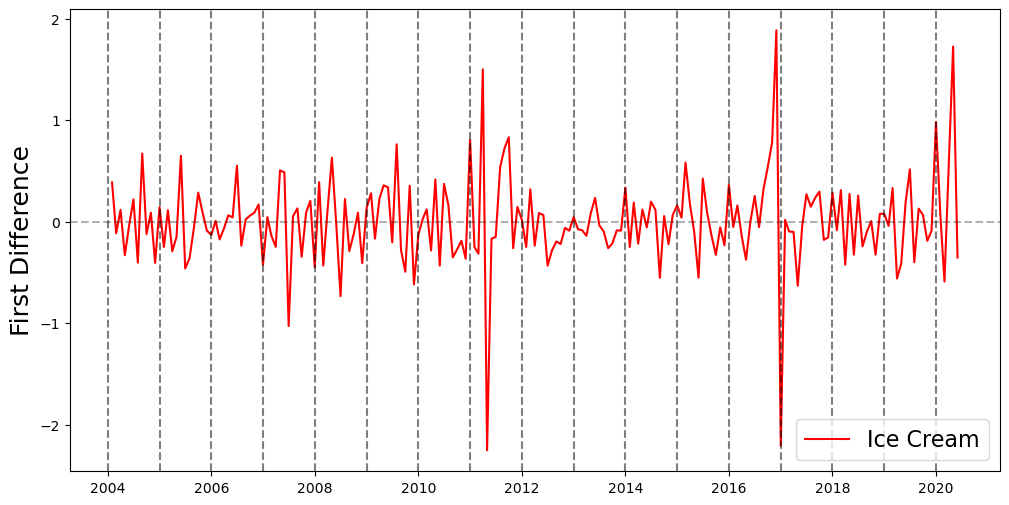

In [94]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(data_ic_h['ice cream'], color= 'red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

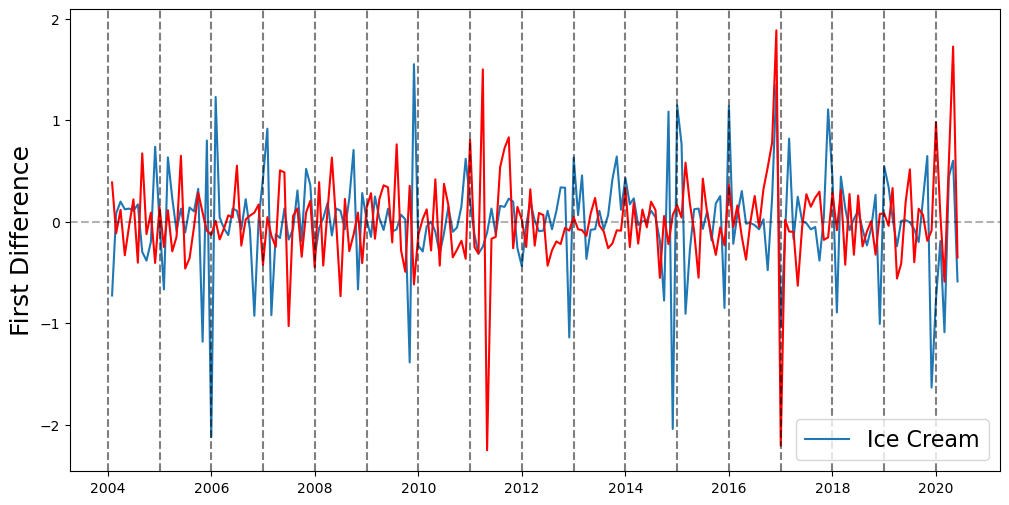

In [95]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(data_ic_h['heater'])
ice_cream, = plt.plot(data_ic_h['ice cream'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

## PACF (Heater)

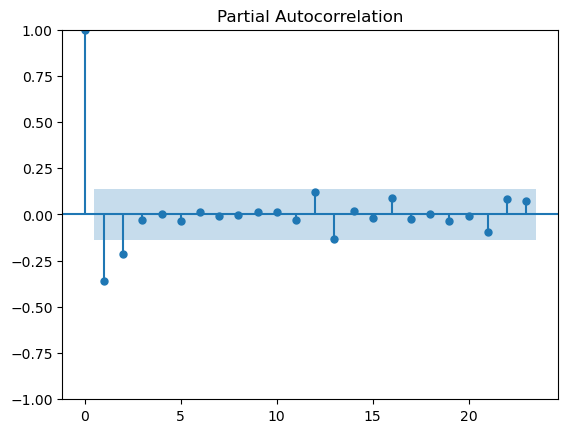

In [96]:
pacf_h= plot_pacf(data_ic_h['heater'])

In [ ]:
# As per the PACF we will consider the AR of lag=2

### Correlation between "heater" and lagged "ice cream"

In [100]:
from scipy.stats import pearsonr

for lag in range(1,14):  # between 1 and 13 months
    heater_series= data_ic_h['heater'].iloc[lag:]
    lagged_ic_series= data_ic_h['ice cream'].iloc[:-lag]
    print(f'Lag: {lag}')
    print(pearsonr(heater_series, lagged_ic_series))
    print('------')

Lag: 1
PearsonRResult(statistic=-0.031544507425915684, pvalue=0.6607284991749396)
------
Lag: 2
PearsonRResult(statistic=-0.09872703210944637, pvalue=0.16970841905089779)
------
Lag: 3
PearsonRResult(statistic=-0.0017838553789235323, pvalue=0.9803056762960982)
------
Lag: 4
PearsonRResult(statistic=0.060239718598255394, pvalue=0.4052979832528621)
------
Lag: 5
PearsonRResult(statistic=-0.054034864480150276, pvalue=0.45664426275056885)
------
Lag: 6
PearsonRResult(statistic=0.0646118302655383, pvalue=0.3745300043445426)
------
Lag: 7
PearsonRResult(statistic=-0.04949334618415869, pvalue=0.4976876685762092)
------
Lag: 8
PearsonRResult(statistic=0.0789083713597735, pvalue=0.28045489704330545)
------
Lag: 9
PearsonRResult(statistic=-0.05323501699600425, pvalue=0.4681034202228026)
------
Lag: 10
PearsonRResult(statistic=0.029536989060791184, pvalue=0.6882054906333288)
------
Lag: 11
PearsonRResult(statistic=-0.05979536351522574, pvalue=0.4175217420485689)
------
Lag: 12
PearsonRResult(stat

In [ ]:
# we can see from above correlation step that p- value for lag 13 is less than 0.05, so we can say that its a significant lag
# lag 13 is like one year ago - one month ago

## VAR

VAR (Vector Autoregression) is a statistical model used for analyzing and forecasting multivariate time series data. It is an extension of the univariate autoregressive model (AR model) to handle multiple time series variables simultaneously.

In a VAR model, each variable in the time series is regressed on its own lagged values and the lagged values of all other variables in the system. The VAR model is specified by two main parameters:

In [101]:
data_ic_h= data_ic_h[['ice cream', 'heater']]

In [103]:
data_ic_h.head()

,ice cream,heater
Month,,
2004-02-01,0.385740,-0.728257
2004-03-01,-0.115049,0.080757
2004-04-01,0.115816,0.197217
2004-05-01,-0.331339,0.121663
2004-06-01,-0.033411,0.128425


In [107]:
from statsmodels.tsa.api import VAR

# define the model
model_var= VAR(data_ic_h)

In [108]:
# fit the model
model_fit= model_var.fit(maxlags= 13)

In [109]:
# summary of the model
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 15, Mar, 2024
Time:                     11:52:11
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.92349
Nobs:                     184.000    HQIC:                  -2.48459
Log likelihood:          -204.405    FPE:                  0.0571123
AIC:                     -2.86700    Det(Omega_mle):       0.0434311
--------------------------------------------------------------------
Results for equation ice cream
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.016054         0.034105           -0.471           0.638
L1.ice cream         -0.287811         0.079633           -3.614           0.000
L1.heater            -0.121251         0.073673         

### Granger Causality Analysis:

In [110]:
from statsmodels.tsa.stattools import grangercausalitytests

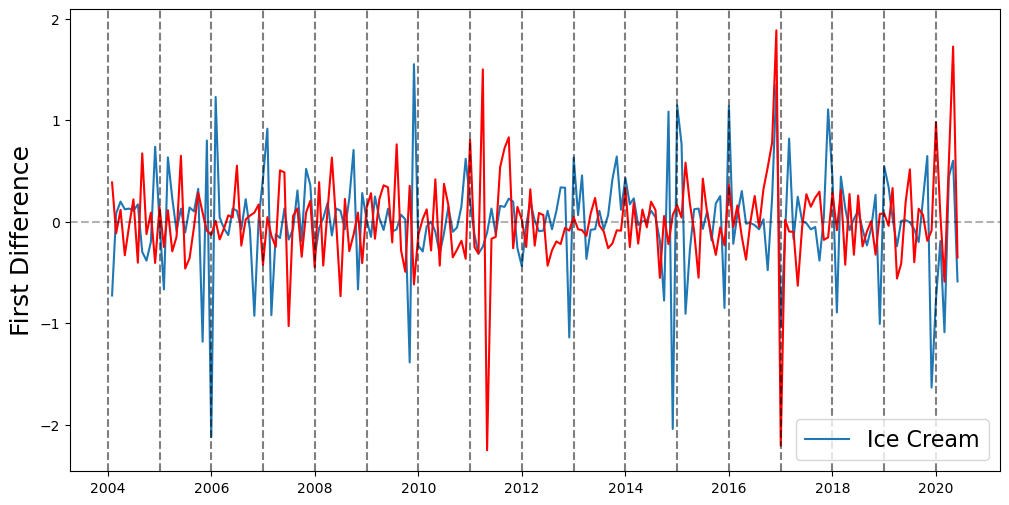

In [111]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(data_ic_h['heater'])
ice_cream, = plt.plot(data_ic_h['ice cream'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

In [115]:
# taking random max lags as 22
gc_res= grangercausalitytests(data_ic_h, 22)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4735  , p=0.2263  , df_denom=193, df_num=1
ssr based chi2 test:   chi2=1.4964  , p=0.2212  , df=1
likelihood ratio test: chi2=1.4907  , p=0.2221  , df=1
parameter F test:         F=1.4735  , p=0.2263  , df_denom=193, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8966  , p=0.4097  , df_denom=190, df_num=2
ssr based chi2 test:   chi2=1.8405  , p=0.3984  , df=2
likelihood ratio test: chi2=1.8318  , p=0.4001  , df=2
parameter F test:         F=0.8966  , p=0.4097  , df_denom=190, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5965  , p=0.6180  , df_denom=187, df_num=3
ssr based chi2 test:   chi2=1.8566  , p=0.6027  , df=3
likelihood ratio test: chi2=1.8478  , p=0.6046  , df=3
parameter F test:         F=0.5965  , p=0.6180  , df_denom=187, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5997  , p=0.6633  

In [ ]:
# even after taking max lag as 22, we can see that their is no p-value whose value is less than 0.05, 
# which says that we dont have granger casuality between heater and icecream